# Food Ingredients and Allergens Exploratoty Data Analysis

In [1]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# reading the csv file into a dataframe
df=pd.read_csv('food_ingredients_and_allergens.csv')

In [4]:
# printing top five rows of dataframe
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


### Performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

In [5]:
# printing the datatypes of each column of dataframe
df.dtypes

Food Product       object
Main Ingredient    object
Sweetener          object
Fat/Oil            object
Seasoning          object
Allergens          object
Prediction         object
dtype: object

In [6]:
# printing information about a dataframe
df.info

<bound method DataFrame.info of             Food Product Main Ingredient Sweetener Fat/Oil       Seasoning  \
0         Almond Cookies         Almonds     Sugar  Butter           Flour   
1         Almond Cookies         Almonds     Sugar  Butter           Flour   
2    Chicken Noodle Soup   Chicken broth      None    None            Salt   
3    Chicken Noodle Soup   Chicken broth      None    None            Salt   
4         Cheddar Cheese          Cheese      None    None            Salt   
..                   ...             ...       ...     ...             ...   
394           Lemon Bars     Lemon juice     Sugar  Butter     Flour, eggs   
395            Pecan Pie          Pecans     Sugar  Butter      Corn syrup   
396       Zucchini Bread        Zucchini     Sugar  Butter  Cinnamon, nuts   
397         Banana Bread         Bananas     Sugar  Butter  Cinnamon, nuts   
398       Hawaiian Pizza     Pizza dough      None    None  Pineapple, ham   

                  Allergens Pre

In [7]:
# printing some basic statistical details of a dataframe
df.describe()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
count,399,399,399,399,399,399,398
unique,259,101,10,36,186,40,2
top,Stuffed Bell Peppers,Chicken,None,Olive oil,None,None,Contains
freq,4,61,280,90,20,148,255


In [8]:
# to print the dimensionality of the dataframe
df.shape

(399, 7)

<Axes: ylabel='Frequency'>

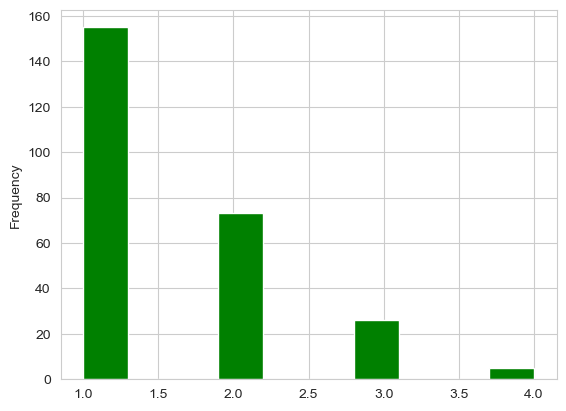

In [19]:
# bar plot of the 'value_counts' for the 'food product' Series
df['Food Product'].value_counts().plot(kind='hist', color='g')

<Axes: >

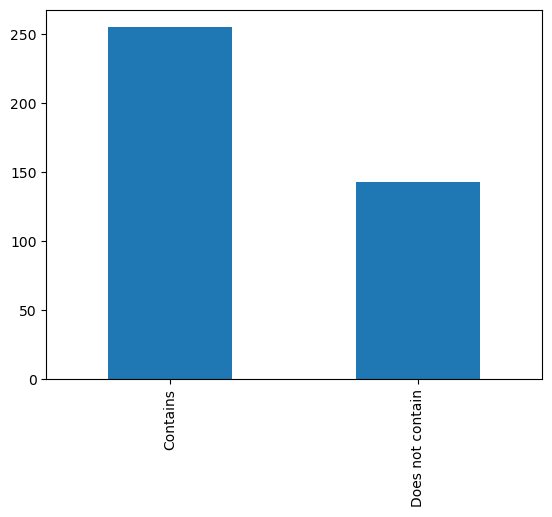

In [15]:
#Checking in the prediction column how many are true and how many are not
df['Prediction'].value_counts().plot(kind='bar')

<Axes: xlabel='Prediction', ylabel='count'>

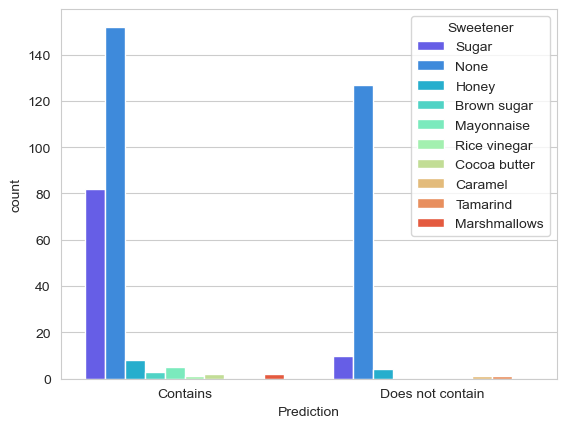

In [17]:
#analysing different categories of sweeteners in alleregens products and non allergens products
sns.set_style('whitegrid')
sns.countplot(x='Prediction',hue='Sweetener',data=df,palette='rainbow')

In [9]:
# to find duplicate rows from in dataframe
sum(df.duplicated())

90

In [10]:
# removing duplicates from dataframe
df.drop_duplicates(inplace=True)
df.shape

(309, 7)

In [11]:
# printing the number of missing values in each column
df.isna().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

<Axes: >

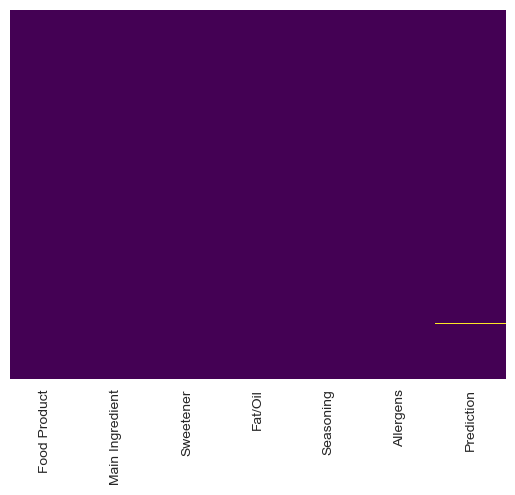

In [18]:
#finding the null values in each series of dataframe using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# droping the missing values present in the dataframe
df.dropna(inplace=True)
df.shape

(308, 7)

In [13]:
# listing the columns of dataframe
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Prediction'],
      dtype='object')

### Cleaning the data by removing missing values, duplicates and now converting the categorical columns into numerical columns using one hot encoder

In [29]:
# encoding the data i.e.converting categorical variable into dummy/indicator variables
Encodeddata=pd.get_dummies(df, drop_first=True)
Encodeddata.head()

,Food Product_Aloo Gobi,Food Product_Aloo Paratha,Food Product_Apple,Food Product_Apple Cider,Food Product_Apple Crisp,Food Product_Apple Pie,Food Product_Avocado Toast,Food Product_BBQ Ribs,Food Product_Bacon-Wrapped Shrimp,Food Product_Baked Apple,...,Allergens_Soybeans,"Allergens_Soybeans, Fish",Allergens_Wheat,"Allergens_Wheat, Dairy","Allergens_Wheat, Dairy, Alcohol","Allergens_Wheat, Dairy, Cocoa","Allergens_Wheat, Dairy, Eggs","Allergens_Wheat, Dairy, Nuts","Allergens_Wheat, Pork, Dairy",Prediction_Does not contain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# seperating independent and dependent features respectively for train_test_split
X=Encodeddata.drop('Prediction_Does not contain', axis=1)
y=Encodeddata['Prediction_Does not contain']

In [67]:
# import the required alogorithms from sklrean library to test the data from dataframe
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### LOGISTIC REGRESSION

In [80]:
# LOGISTIC REGRESSION implementation

# splitting into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

# initialising the model, fitting train and test data, finding out the score and predicted values
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_score=lr.score(X_test,y_test)
print("score:",lr_score);
pred_values=lr.predict(X_test)

# to print confusion matrix
cm=confusion_matrix(y_test,pred_values)
cm
print(cm)

score: 0.978494623655914
[[59  2]
 [ 0 32]]


### DECISION TREE CLASSIFIER

In [81]:
#DECISION TREE CLASSIFIER

# splitting into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

# initialising the model by defining parameters
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# passing the parameters of model to gridsearch and fitting the data to it to find best parameters and best score
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

print("Best Parameters:", dt_grid_search.best_params_)
print("Best Score:", dt_grid_search.best_score_)

# to print the confusion matrix
best_model = dt_grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Best Model")
print(dt_cm)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Score: 0.9953488372093023
Confusion Matrix for Best Model
[[59  2]
 [ 0 32]]


### RANDOM FOREST CLASSIFIER

In [83]:
#RandomForest

# splitting into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# initialising the model by defining parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 10]
}

# passing the parameters of model to gridsearch and fitting the data to it to find best parameters and best score
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=4)
rf_grid_search.fit(X_train, y_train)

print("Best Parameters:", rf_grid_search.best_params_)
print("Best Score:", rf_grid_search.best_score_)

# to print the confusion matrix
best_model = rf_grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Best Model")
print(rf_cm)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9953703703703703
Confusion Matrix for Best Model
[[56  4]
 [ 0 33]]


### GAUSSIAN NAIVE BAYES CLASSIFIER

In [84]:
#Guassian

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# initialising the model by defining parameters
nb = GaussianNB()
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# passing the parameters of model to gridsearch and fitting the data to it to find best parameters and best score
nb_grid_search = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)


print("Best Parameters:", nb_grid_search.best_params_)
print("Best Score:", nb_grid_search.best_score_)

# to print the confusion matrix
best_model = nb_grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
nb_cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Best Model")
print(nb_cm)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.9488372093023255
Confusion Matrix for Best Model
[[56  4]
 [ 2 31]]


### SUPPORT VECTOR CLASSIFIER

In [85]:
#svc

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialising the model by defining parameters
sv=SVC()
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

# to print the confusion matrix
sv_gd=GridSearchCV(sv,parameters,cv=5)
sv_gd.fit(X_train,y_train)

print("Best_param",sv_gd.best_params_)
print("score:",sv_gd.best_score_)

Best_param {'C': 1, 'kernel': 'linear'}
score: 0.9953488372093023


### KNEIGHBORS CLASSIFIER

In [86]:
#knn

# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialising the model 
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

# to print the score of model
kn_score=kn.score(X_test,y_test)
print("score:", kn_score)

# to print the confusion matrix
y_pred=kn.predict(X_test)
kn_cm=confusion_matrix(y_pred,y_test)
print(kn_cm)

score: 0.8924731182795699
[[50  0]
 [10 33]]


In [87]:
#scorestable

score={
       'Model_Name' : ['Random Forest','Decision Tree','K Neighbors','SVC ','Logistic Regression','GuassianNB'],
       'Score'   : [rf_grid_search.best_score_,dt_grid_search.best_score_,kn_score,sv_gd.best_score_,lr_score, nb_grid_search.best_score_]
        }
  

score_df= pd.DataFrame(score)
score_df

,Model_Name,Score
0,Random Forest,0.995370
1,Decision Tree,0.995349
2,K Neighbors,0.892473
3,SVC,0.995349
4,Logistic Regression,0.978495
5,GuassianNB,0.948837


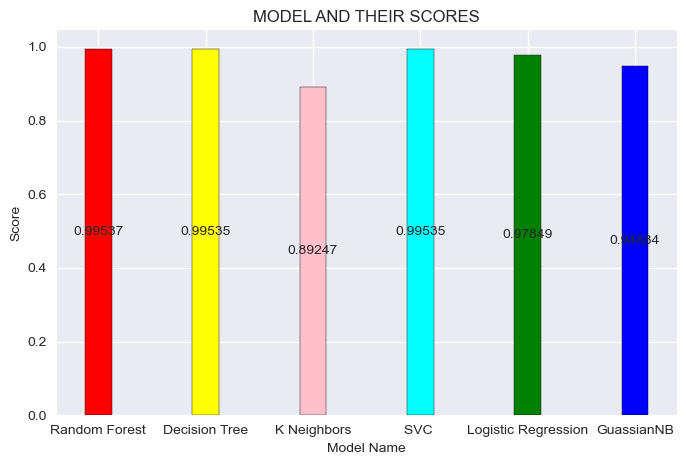

In [88]:
#plot

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 5))
barplot = plt.bar(score_df.Model_Name, score_df.Score,color =['red', 'yellow', 'pink', 'cyan','green','blue'] ,edgecolor = "black", width = 0.25)
plt.bar_label(barplot , labels= round(score_df.Score,5), label_type='center')
plt.xlabel("Model Name")
plt.ylabel("Score")
plt.title("MODEL AND THEIR SCORES")
plt.show()

### After analysing, processing of data evaluating the speed and training time of each model and from the scores of model we can conclude that RandomForest classifier is of high accuracy and best perfomance among all ofcourse Decision Tree and SVC are also giving the best score on predicting the data

